## Factor Model

In [1]:
### You can go back to the colab notebook, to realise there any many things to add. 
### The Colab notebook, still has to be put into the pipeline of things. 

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sovai as sov

sov.basic_auth("your_email@example.com", "your_password")

True

#### Processed Dataset

In [34]:
df_accounting = sov.data("factors/accounting", tickers=["TSLA","MSFT"]); df_accounting.tail()

profitability  value  solvency  cash_flow  illiquidity  \
ticker date                                                                 
TSLA   2024-03-15         89.000  5.000    36.000     84.000        5.000   
       2024-03-22         89.000  4.000    36.000     84.000       14.000   
       2024-03-29         89.000  4.000    35.000     83.000        3.000   
       2024-04-05         89.000  4.000    35.000     83.000        6.000   
       2024-04-12         88.000  4.000    35.000     83.000       20.000   

                   momentum_long_term  momentum_medium_term  \
ticker date                                                   
TSLA   2024-03-15              37.000                13.000   
       2024-03-22              23.000                 6.000   
       2024-03-29              24.000                10.000   
       2024-04-05              25.000                15.000   
       2024-04-12              23.000                31.000   

                   short_term_reversal  price_volatility  dividend_yield  \
ticker date                                                                
TSLA   2024-03-15               92.000            59.000          59.000   
       2024-03-22               72.000            58.000          58.000   
       2024-03-29               47.000            58.000          58.000   
       2024-04-05               78.000            56.000          56.000   
       2024-04-12               23.000            57.000          57.000   

                   earnings_consistency  small_size  low_growth  \
ticker date                                                       
TSLA   2024-03-15                89.000       1.000      10.000   
       2024-03-22                84.000       1.000      10.000   
       2024-03-29                99.000       1.000      10.000   
       2024-04-05                98.000       1.000      10.000   
       2024-04-12                93.000       1.000      10.000   

                   low_equity_issuance  bounce_dip  accrual_growth  \
ticker date                                                          
TSLA   2024-03-15               42.000      98.000          27.000   
       2024-03-22               48.000      96.000          27.000   
       2024-03-29               43.000      96.000          29.000   
       2024-04-05               45.000      97.000          29.000   
       2024-04-12               49.000      97.000          29.000   

                   low_depreciation_growth  current_liquidity  low_rnd  \
ticker date                                                              
TSLA   2024-03-15                   55.000             70.000   28.000   
       2024-03-22                   55.000             70.000   28.000   
       2024-03-29                   55.000             70.000   27.000   
       2024-04-05                   55.000             70.000   27.000   
       2024-04-12                   55.000             70.000   28.000   

                   momentum  composite_score  
ticker date                                   
TSLA   2024-03-15    22.000           50.600  
       2024-03-22    12.000           49.125  
       2024-03-29    14.000           48.775  
       2024-04-05    17.000           49.900  
       2024-04-12    22.000           49.275

### Composite Score

In [ ]:
weights = {
    'profitability': 0.15,
    'value': 0.15,
    'solvency': 0.1,
    'cash_flow': 0.1,
    'momentum': 0.1,
    'earnings_consistency': 0.05,
    'small_size': 0.05,
    'low_equity_issuance': 0.05,
    'accrual_growth': 0.05,
    'current_liquidity': 0.05,
    'low_rnd': 0.05,
    'illiquidity': 0.025,
    'short_term_reversal': 0.025,
    'price_volatility': 0.025,
    'dividend_yield': 0.025,
    'low_growth': 0.025,
    'bounce_dip': 0.025,
    'low_depreciation_growth': 0.025,
}

def composite_score(row):
    score = 0
    for factor, weight in weights.items():
        score += row[factor] * weight
    return score

df_accounting['composite_score'] = df_accounting.apply(composite_score, axis=1)

Depending on the investors believe the above composite score can be constructed. 

    1. Profitability (+): More profitable firms tend to outperform less profitable firms, as they have a stronger financial position and better prospects for future growth.
    
    2. Value (+): Undervalued stocks (high book-to-market ratio) tend to outperform overvalued stocks, as they may be mispriced by the market and have more potential for price appreciation.
    
    3. Solvency (+): Firms with strong balance sheets and low debt ratios tend to outperform those with weaker financial positions, as they are less risky and more resilient during market downturns.


*It's important to note that the strength and consistency of these relationships may vary across different markets, time periods, and economic conditions.*

Plotting for random tickers. Specify tickers to plot specific data.


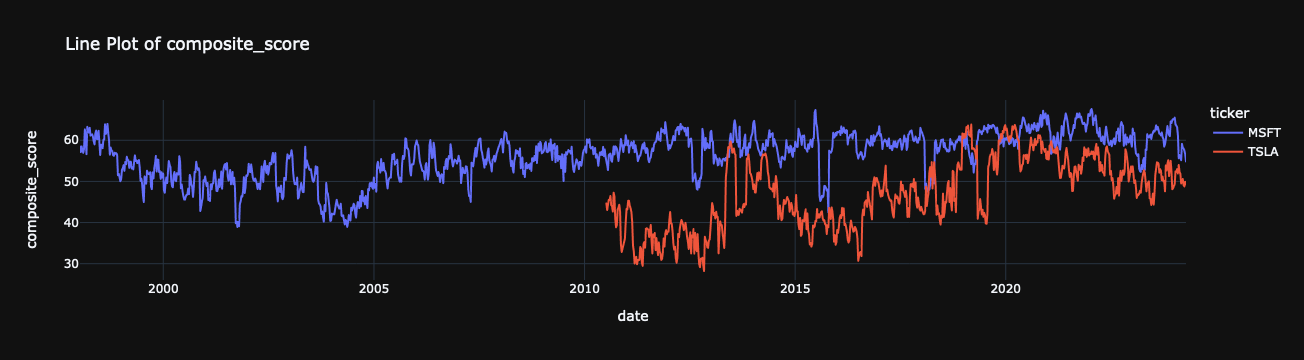

In [36]:
df_accounting.plot_line('composite_score')

### Comprehensive Factors

Addition of non-traditional financial metrics such as market risk, business risk, political risk, and inflation risk, this dataset helps in evaluating external factors that could impact a company's performance.

In [37]:
df_comprehensive = sov.data("factors/comprehensive", tickers=["TSLA","MSFT"]); df_comprehensive.tail()

profitability  value  solvency  cash_flow  illiquidity  \
ticker date                                                                 
TSLA   2024-01-19         60.000  2.000    36.000     81.000       77.000   
       2024-01-26         60.000  3.000    36.000     81.000       86.000   
       2024-02-02         60.000  3.000    36.000     81.000        3.000   
       2024-02-09         88.000  3.000    36.000     86.000        1.000   
       2024-02-16         88.000  3.000    36.000     86.000        4.000   

                   momentum_long_term  momentum_medium_term  \
ticker date                                                   
TSLA   2024-01-19              73.000                59.000   
       2024-01-26              67.000                65.000   
       2024-02-02              71.000                67.000   
       2024-02-09              73.000                69.000   
       2024-02-16              68.000                54.000   

                   short_term_reversal  price_volatility  dividend_yield  \
ticker date                                                                
TSLA   2024-01-19               85.000            52.000          52.000   
       2024-01-26               98.000            58.000          58.000   
       2024-02-02               86.000            61.000          61.000   
       2024-02-09               63.000            58.000          58.000   
       2024-02-16               32.000            57.000          57.000   

                   earnings_consistency  small_size  low_growth  \
ticker date                                                       
TSLA   2024-01-19                61.000       1.000      10.000   
       2024-01-26                50.000       1.000      10.000   
       2024-02-02                75.000       1.000      10.000   
       2024-02-09                90.000       1.000      11.000   
       2024-02-16                89.000       1.000      11.000   

                   low_equity_issuance  bounce_dip  accrual_growth  \
ticker date                                                          
TSLA   2024-01-19               44.000      97.000          73.000   
       2024-01-26               49.000      97.000          73.000   
       2024-02-02               39.000      96.000          73.000   
       2024-02-09               29.000      96.000          26.000   
       2024-02-16               35.000      93.000          24.000   

                   low_depreciation_growth  current_liquidity  low_rnd  \
ticker date                                                              
TSLA   2024-01-19                   55.000             71.000   24.000   
       2024-01-26                   55.000             71.000   24.000   
       2024-02-02                   56.000             71.000   24.000   
       2024-02-09                   55.000             69.000   29.000   
       2024-02-16                   56.000             69.000   29.000   

                   momentum  market_risk  business_risk  political_risk  \
ticker date                                                               
TSLA   2024-01-19    69.000       59.000         40.000           2.000   
       2024-01-26    69.000       48.000         51.000           4.000   
       2024-02-02    73.000       41.000         44.000           1.000   
       2024-02-09    74.000       42.000         39.000           2.000   
       2024-02-16    63.000       30.000         58.000           2.000   

                   inflation_fluctuation  inflation_persistence  returns  
ticker date                                                               
TSLA   2024-01-19                  8.000                 71.000   -0.031  
       2024-01-26                 13.000                 72.000   -0.136  
       2024-02-02                 12.000                 58.000    0.025  
       2024-02-09                 17.000                 66.000    0.030  
       2024-02-16                 15.000        

Plotting for random tickers. Specify tickers to plot specific data.


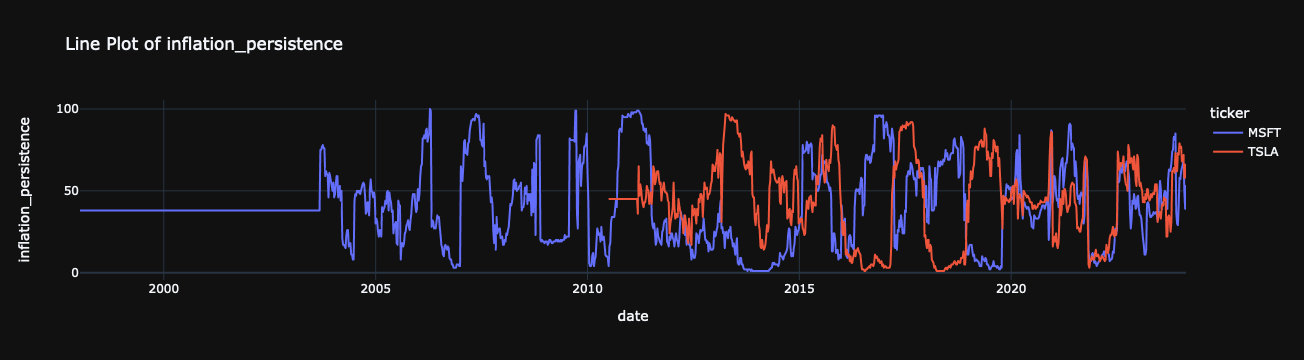

In [38]:
df_comprehensive.plot_line("inflation_persistence")

### Factor Statistical Analysis

#### Coefficient Values


* **Purpose**: The coefficient values represent the estimated impact of each factor on the stock returns. They indicate the direction (positive or negative) and magnitude of the relationship between the factors and returns.
* **Investor Benefit**: By tracking the coefficient values over time, investors can identify which factors have a significant influence on stock returns and how their impact changes. This information can help in making investment decisions based on the prevailing market conditions and factor exposures.


In [39]:
df_coefficients = sov.data("factors/coefficients", tickers=["TSLA","MSFT"]); df_coefficients.tail()

intercept  profitability_coef  value_coef  solvency_coef  \
ticker date                                                                   
TSLA   2024-01-19      0.162               1.703      -1.324          0.039   
       2024-01-26      0.030               0.100      -1.972          0.146   
       2024-02-02     -0.029               1.086      -2.335         -0.290   
       2024-02-09      0.080               0.961       0.085         -0.927   
       2024-02-16      0.024               0.293       0.829         -1.052   

                   cash_flow_coef  illiquidity_coef  momentum_long_term_coef  \
ticker date                                                                    
TSLA   2024-01-19          -3.036             2.044                   -1.935   
       2024-01-26          -0.679             2.421                   -2.556   
       2024-02-02          -1.562             2.529                   -2.200   
       2024-02-09          -1.843             1.528                    0.079   
       2024-02-16          -0.910             1.198                    0.298   

                   momentum_medium_term_coef  short_term_reversal_coef  \
ticker date                                                              
TSLA   2024-01-19                      2.513                     0.647   
       2024-01-26                      0.970                     0.127   
       2024-02-02                      1.742                    -0.178   
       2024-02-09                      3.666                     0.263   
       2024-02-16                      5.838                     0.107   

                   price_volatility_coef  dividend_yield_coef  \
ticker date                                                     
TSLA   2024-01-19                  0.426                0.426   
       2024-01-26                  0.387                0.387   
       2024-02-02                  0.191                0.191   
       2024-02-09                 -0.058               -0.058   
       2024-02-16                 -0.256               -0.256   

                   earnings_consistency_coef  small_size_coef  \
ticker date                                                     
TSLA   2024-01-19                     -1.085            0.463   
       2024-01-26                     -2.146            0.756   
       2024-02-02                     -1.924            2.448   
       2024-02-09                     -2.069            1.042   
       2024-02-16                     -2.418            0.577   

                   low_growth_coef  low_equity_issuance_coef  bounce_dip_coef  \
ticker date                                                                     
TSLA   2024-01-19           -1.412                     0.077           -0.606   
       2024-01-26            1.015                    -1.061           -0.531   
       2024-02-02           -0.702                     0.479           -0.706   
       2024-02-09           -2.654                     0.026           -0.652   
       2024-02-16           -4.608                     0.350           -0.531   

                   accrual_growth_coef  low_depreciation_growth_coef  \
ticker date                                                            
TSLA   2024-01-19               -3.804                        -0.718   
       2024-01-26               -2.867                        -1.105   
       2024-02-02               -3.618                        -0.143   
       2024-02-09               -3.169                        -0.484   
       2024-02-16               -3.155                        -1.109   

                   current_liquidity_coef  low_rnd_coef  momentum_coef  \
ticker date                                                              
TSLA   2024-01-19                  -2.856         0.052         -1.158   
       2024-01-26                  -4.059        -3.144          2.160   
       2024-02-02                  -3.768        -3.334          0.867   
       2024-02-09             

#### Standard Errors

- **Purpose:** Standard errors measure the statistical uncertainty associated with the estimated coefficients. They provide a range around the coefficient estimates, indicating the precision of the estimates.
- **Investor Benefit:** Lower standard errors suggest more precise coefficient estimates, increasing confidence in the factor relationships. Investors can assess the reliability of the factor models by monitoring the standard errors over time.


In [41]:
df_standard_errors = sov.data("factors/standard_errors", tickers=["TSLA","MSFT"]); df_standard_errors.tail()

intercept_se  profitability_se  value_se  solvency_se  \
ticker date                                                                
TSLA   2024-01-19         0.122             1.980     1.330        1.229   
       2024-01-26         0.158             2.630     1.924        1.691   
       2024-02-02         0.144             2.440     2.046        1.678   
       2024-02-09         0.155             2.920     1.915        2.070   
       2024-02-16         0.140             2.649     1.596        1.855   

                   cash_flow_se  illiquidity_se  momentum_long_term_se  \
ticker date                                                              
TSLA   2024-01-19         2.223           0.601                  1.512   
       2024-01-26         2.881           0.811                  2.062   
       2024-02-02         2.736           0.876                  1.963   
       2024-02-09         3.340           0.834                  2.002   
       2024-02-16         3.046           0.704                  1.757   

                   momentum_medium_term_se  short_term_reversal_se  \
ticker date                                                          
TSLA   2024-01-19                    2.495                   0.468   
       2024-01-26                    3.372                   0.605   
       2024-02-02                    3.333                   0.526   
       2024-02-09                    3.753                   0.617   
       2024-02-16                    3.528                   0.560   

                   price_volatility_se  dividend_yield_se  \
ticker date                                                 
TSLA   2024-01-19                0.298              0.298   
       2024-01-26                0.413              0.413   
       2024-02-02                0.376              0.376   
       2024-02-09                0.418              0.418   
       2024-02-16                0.389              0.389   

                   earnings_consistency_se  small_size_se  low_growth_se  \
ticker date                                                                
TSLA   2024-01-19                    1.494          1.069          2.535   
       2024-01-26                    2.060          1.467          3.452   
       2024-02-02                    2.016          1.835          3.216   
       2024-02-09                    2.350          2.077          3.574   
       2024-02-16                    2.084          1.603          3.394   

                   low_equity_issuance_se  bounce_dip_se  accrual_growth_se  \
ticker date                                                                   
TSLA   2024-01-19                   1.783          0.935              1.855   
       2024-01-26                   2.400          1.290              2.518   
       2024-02-02                   2.293          1.327              2.365   
       2024-02-09                   2.730          1.686              2.750   
       2024-02-16                   2.452          1.503              2.465   

                   low_depreciation_growth_se  current_liquidity_se  \
ticker date                                                           
TSLA   2024-01-19                       1.345                 1.430   
       2024-01-26                       1.865                 2.051   
       2024-02-02                       1.614                 1.913   
       2024-02-09                       1.998                 2.043   
       2024-02-16                       1.807                 1.776   

                   low_rnd_se  momentum_se  market_risk_se  business_risk_se  \
ticker date                                                                    
TSLA   2024-01-19       2.806        3.401           0.328             0.370   
       2024-01-26       3.691        4.449           0.429             0.499   
       2024-02-02       3.746        4.281           0.414             0.512   
       2024-02-09       3.460        4.891           0.466     

#### T-Statistics

- **Purpose:** T-statistics are used to determine the statistical significance of the coefficient estimates. They measure how many standard deviations the coefficients are from zero, helping to assess whether the factor relationships are statistically meaningful.
- **Investor Benefit:** Significant t-statistics (usually greater than 2 or less than -2) indicate that the factor relationships are unlikely to be due to chance. Investors can focus on factors with consistently significant t-statistics, as they are more likely to have a real impact on stock returns.


In [43]:
df_t_statistics = sov.data("factors/t_statistics", tickers=["TSLA","MSFT"]); df_t_statistics.tail()

intercept_t  profitability_t  value_t  solvency_t  \
ticker date                                                            
TSLA   2024-01-19        1.325            0.860   -0.996       0.032   
       2024-01-26        0.192            0.038   -1.025       0.086   
       2024-02-02       -0.199            0.445   -1.141      -0.173   
       2024-02-09        0.518            0.329    0.044      -0.448   
       2024-02-16        0.173            0.111    0.520      -0.567   

                   cash_flow_t  illiquidity_t  momentum_long_term_t  \
ticker date                                                           
TSLA   2024-01-19       -1.366          3.400                -1.280   
       2024-01-26       -0.236          2.984                -1.240   
       2024-02-02       -0.571          2.886                -1.121   
       2024-02-09       -0.552          1.833                 0.039   
       2024-02-16       -0.299          1.702                 0.169   

                   momentum_medium_term_t  short_term_reversal_t  \
ticker date                                                        
TSLA   2024-01-19                   1.007                  1.383   
       2024-01-26                   0.287                  0.209   
       2024-02-02                   0.523                 -0.338   
       2024-02-09                   0.977                  0.427   
       2024-02-16                   1.655                  0.191   

                   price_volatility_t  dividend_yield_t  \
ticker date                                               
TSLA   2024-01-19               1.429             1.429   
       2024-01-26               0.937             0.937   
       2024-02-02               0.508             0.508   
       2024-02-09              -0.139            -0.139   
       2024-02-16              -0.659            -0.659   

                   earnings_consistency_t  small_size_t  low_growth_t  \
ticker date                                                             
TSLA   2024-01-19                  -0.726         0.433        -0.557   
       2024-01-26                  -1.042         0.515         0.294   
       2024-02-02                  -0.954         1.334        -0.218   
       2024-02-09                  -0.880         0.502        -0.743   
       2024-02-16                  -1.160         0.360        -1.358   

                   low_equity_issuance_t  bounce_dip_t  accrual_growth_t  \
ticker date                                                                
TSLA   2024-01-19                  0.043        -0.649            -2.051   
       2024-01-26                 -0.442        -0.411            -1.139   
       2024-02-02                  0.209        -0.532            -1.530   
       2024-02-09                  0.010        -0.387            -1.153   
       2024-02-16                  0.143        -0.353            -1.280   

                   low_depreciation_growth_t  current_liquidity_t  low_rnd_t  \
ticker date                                                                    
TSLA   2024-01-19                     -0.534               -1.996      0.019   
       2024-01-26                     -0.593               -1.979     -0.852   
       2024-02-02                     -0.088               -1.970     -0.890   
       2024-02-09                     -0.242               -0.976      0.369   
       2024-02-16                     -0.614               -0.418      0.946   

                   momentum_t  market_risk_t  business_risk_t  \
ticker date                                                     
TSLA   2024-01-19      -0.340          1.691           -0.312   
       2024-01-26       0.485          0.557            0.240   
       2024-02-02       0.203          0.182            0.308   
       2024-02-09      -0.551         -0.468           -0.837   
       2024-02-16      -1.202         -1.081           -0.270   

                   political_risk_t  inflation_fluctuation_t  \

#### Model Metrics

- R-squared and Adjusted R-squared:
  - Purpose: R-squared measures the proportion of the variance in stock returns explained by the factor model. Adjusted R-squared accounts for the number of factors used, penalizing model complexity.
  - Investor Benefit: Higher R-squared values suggest that the factor model captures a significant portion of the return variability. Investors can compare R-squared across models and over time to assess their explanatory power and identify the most effective models (generally R-Squared greater than 0.3).

- F-value:
  - Purpose: The F-value evaluates the overall significance of the factor model. It tests whether the factors jointly have a significant impact on stock returns.
  - Investor Benefit: A significant F-value indicates that the factor model as a whole is statistically meaningful. Investors can use the F-value to gauge the overall relevance of the model in explaining stock returns (generally F-value greater than 1).


In [45]:
df_model_metrics = sov.data("factors/model_metrics", tickers=["TSLA","MSFT"]); df_model_metrics.tail()

rsquared  rsquared_adj  fvalue      aic     bic  mse_resid  \
ticker date                                                                     
TSLA   2024-01-19     0.838         0.483   2.362 -108.703 -69.115      0.002   
       2024-01-26     0.721         0.112   1.183  -85.781 -46.193      0.004   
       2024-02-02     0.713         0.088   1.141  -85.759 -46.171      0.004   
       2024-02-09     0.586        -0.319   0.647  -74.804 -35.216      0.006   
       2024-02-16     0.620        -0.209   0.747  -82.661 -43.074      0.005   

                   mse_total  
ticker date                   
TSLA   2024-01-19      0.005  
       2024-01-26      0.005  
       2024-02-02      0.005  
       2024-02-09      0.005  
       2024-02-16      0.004